In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lattice import Triangular_Lattice 

%load_ext autoreload
%matplotlib inline

## Visualize Moire Potential

<a list of 90 text.Text objects>

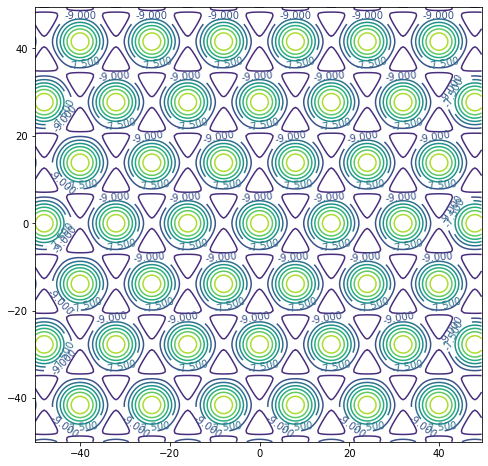

In [2]:
%autoreload 2
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

delta = 0.5
x = np.arange(-50, 50, delta)
y = np.arange(-50, 50, delta)
X, Y = np.meshgrid(x, y)
moire = Triangular_Lattice(16, 1) # 16nm lattice constant, 1eV energy amplitude
Z = moire.U(X, Y)
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)

## Parameterize random walkers

In [3]:
%autoreload 2
from walker import Graphene_Walker
moire = Triangular_Lattice(16, 1) # 16nm lattice constant, 1meV energy amplitude
walkers = Graphene_Walker(0.246, 15) # 2.46 Angstrom lattice, 10 Kelvin
tracks = walkers.get_tracks(moire, nsteps=300, njumps=100000, nparticles=100)

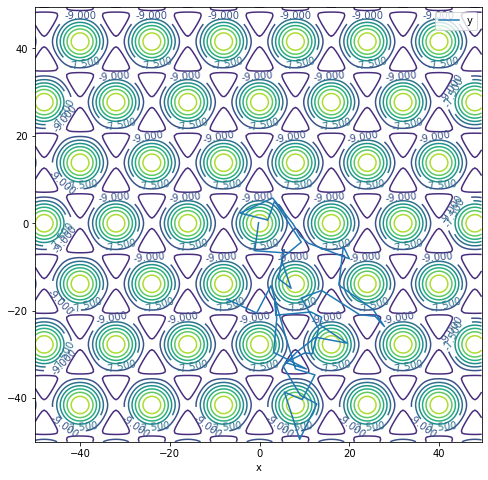

In [4]:
%autoreload 2
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

delta = 0.5
x = np.arange(-50, 50, delta)
y = np.arange(-50, 50, delta)
X, Y = np.meshgrid(x, y)
moire = Triangular_Lattice(16, 1) # 16nm lattice constant, 1eV energy amplitude
Z = moire.U(X, Y)
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
tracks[tracks['particle'] == 0].plot(x = 'x', y='y', ax=ax)

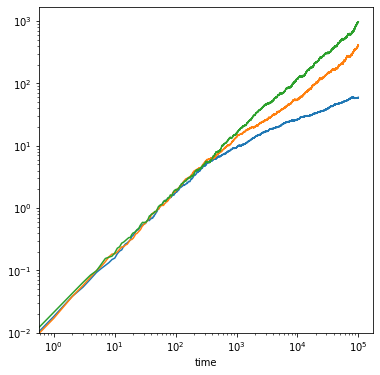

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
for temperature in [2, 5, 10]:
    moire = Triangular_Lattice(16, 1) # 16nm lattice constant, 1meV energy amplitude
    walkers = Graphene_Walker(0.246, temperature) # 2.46 Angstrom lattice, 10 Kelvin
    tracks = walkers.get_tracks(moire, nsteps=100000, njumps=100000, nparticles=100, endT=1e5)
    tracks.groupby('time')['r^2'].mean().plot(ax=ax)
    x = np.linspace(1, tracks.time.max())
    ax.set_xscale("log")
    ax.set_yscale("log")

## Temperature Plots (figure 3)

In [10]:
from utils import *

In [81]:
temperatures = range(1, 70, 10)

all_temp_activations = []
all_temp_predictions = []
all_temp_values = []
num_fbm = []
num_brownian = []
num_ctrw = []

for temp in temperatures:
    ## generate tracks at that temperature
    moire = Triangular_Lattice(16, 1) # 16nm lattice constant, 1meV energy amplitude
    walkers = Graphene_Walker(0.246, temp) # 2.46 Angstrom lattice, 10 Kelvin
    tracks = walkers.get_tracks(moire, nsteps=100000, njumps=100000, nparticles=100, endT=1e5)

    ## gather x and y values
    x = []
    y = []
    for particle in list(set(tracks['particle'])):
        x.append(np.array(tracks[tracks['particle'] == particle]['x']))
        y.append(np.array(tracks[tracks['particle'] == particle]['y']))
    x = np.array(x)
    y = np.array(y)

    ## calculate dx and y
    temp_x = x-np.mean(x)
    temp_dx = np.diff(temp_x)
    temp_dx = temp_dx/np.std(temp_dx)
    
    print(temp_dx)
    ## trim x and y to shape
    temp_dx = temp_dx[:,::int(temp_dx.shape[1] / 50)][:,:-1]
    
    temp_values, temp_predictions = classification_on_real(temp_dx)
    all_temp_activations.append(get_activations(temp_dx))
    
    num_fbm.append(sum([1 for idx, x in temp_predictions if x == 0]))
    num_brownian.append(sum([1 for idx, x in temp_predictions if x == 1]))
    num_ctrw.append(sum([1 for idx, x in temp_predictions if x == 2]))
    
    all_temp_predictions.append(temp_predictions)
    all_temp_values.append(temp_values)
    
all_temp_activations = np.array(all_temp_activations)

[[ 0.00000000e+00 -1.02859607e-14  1.31585825e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.57929127e+00  0.00000000e+00  6.57929127e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.57929127e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  1.97378738e+01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.57929127e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.57929127e+00  6.57929127e+00  2.05719213e-14 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 0.          0.          2.02870737 ...  0.          0.
   0.        ]
 [ 0.          0.         -1.01435369 ...  0.         -3.04306106
   0.        ]
 [ 2.02870737  0.         -2.02870737 ...  0.          0.
   0.        ]
 ...
 [ 0.         -1.01435369  0.         ...  2.02870737  0.
   0.        ]
 [-1.01435369  0.          0.         ...  1.01435369  2.02

Text(0.5, 1.0, 'Temperature vs Proportion of Class')

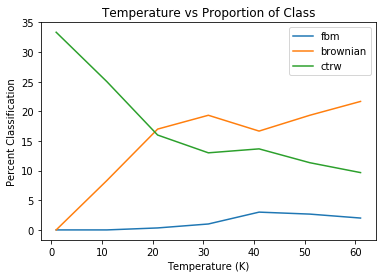

In [82]:
x = temperatures
plt.plot(x, np.array(num_fbm) / 3, c="tab:blue",label="fbm")
plt.plot(x, np.array(num_brownian) / 3, c="tab:orange", label="brownian")
plt.plot(x, np.array(num_ctrw) / 3, c="tab:green",label="ctrw")
plt.legend()
plt.xlabel("Temperature (K)")
plt.ylabel("Percent Classification")
plt.title("Temperature vs Proportion of Class")